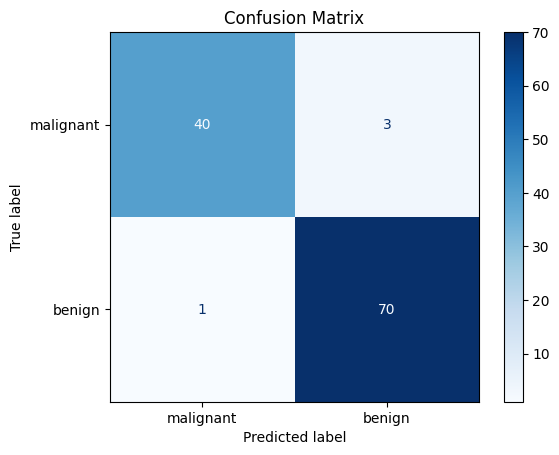

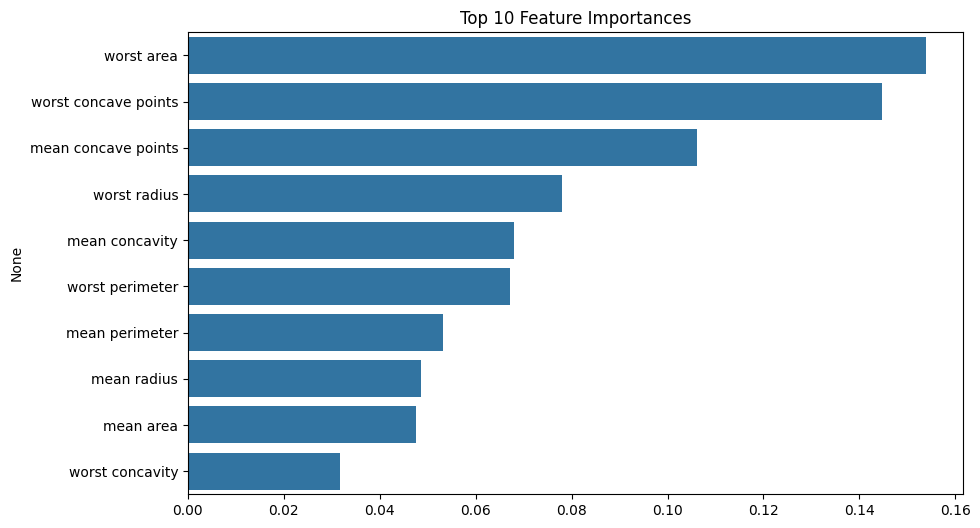

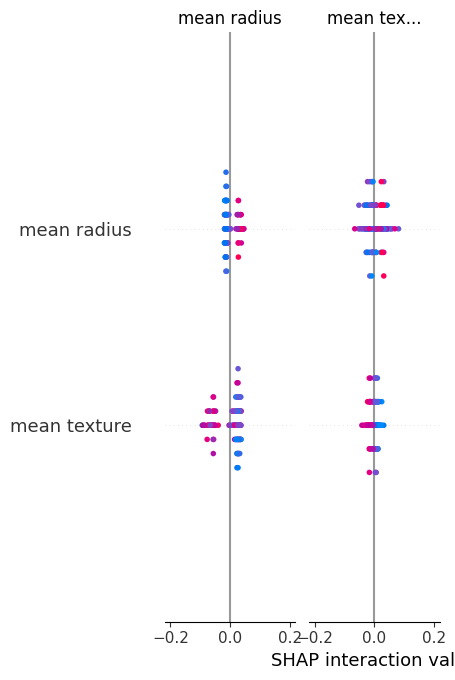

In [2]:
# 📦 Full Colab Cell: Train + Evaluate + Explain (Classification)

# --- Install dependencies ---
!pip install shap matplotlib seaborn scikit-learn pandas numpy -q

# --- Imports ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import shap

# --- Load dataset (Breast Cancer example) ---
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- Feature Importance ---
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10])
plt.show()

# --- SHAP Explainability (fixed) ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Handle classification (list of arrays) vs regression
if isinstance(shap_values, list):
    # For binary classification, choose class 1 (positive class)
    shap_to_plot = shap_values[1]
else:
    shap_to_plot = shap_values

# Convert X_test to right format
X_test_for_shap = X_test.copy()

# SHAP summary plot (bar)
shap.summary_plot(shap_to_plot, X_test_for_shap, plot_type="bar", show=True)
